In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import collections
from collections import defaultdict
import math
from wordcloud import WordCloud

# Loading the data

In [37]:
df_tweets = pd.read_csv("C:\\Users\\USER\\Documents\\Geetha\\Data Science\\Capstone Project 1\\tweets.csv", parse_dates=True)  

In [38]:
df_tweets = df_tweets.set_index(['time','username'])
df_tweets.drop(['name'],axis = 1, inplace = True)

In [60]:
df_tweets.head(10)


,,description,location,followers,numberstatuses,tweets
time,username,,,,,
1/6/2015 21:07,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: 'a message to the truthfu...
1/6/2015 21:27,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: sheikh fatih al jawlani '...
1/6/2015 21:29,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: first audio meeting with ...
1/6/2015 21:37,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: sheikh nasir al wuhayshi ...
1/6/2015 21:45,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: aqap: 'response to sheikh...
1/6/2015 21:51,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,the second clip in a da'wah series by a soldie...
1/6/2015 22:04,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english transcript : oh murabit! : http://t.co...
1/6/2015 22:06,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: 'a collection of the word...
1/6/2015 22:17,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,aslm please share our new account after the pr...


In [40]:
df_tweets.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       14728 non-null object
location          11432 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


#### Columns 'description' and 'location' have null values

In [41]:
df_tweets['description'] = df_tweets['description'].fillna(' ')

In [42]:
df_tweets['location'] = df_tweets['location'].fillna(' ')

#### NaNs replaced with empty string in the columns 'description' and 'location' 

In [61]:
df_tweets.head(10)

,,description,location,followers,numberstatuses,tweets
time,username,,,,,
1/6/2015 21:07,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: 'a message to the truthfu...
1/6/2015 21:27,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: sheikh fatih al jawlani '...
1/6/2015 21:29,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: first audio meeting with ...
1/6/2015 21:37,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: sheikh nasir al wuhayshi ...
1/6/2015 21:45,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: aqap: 'response to sheikh...
1/6/2015 21:51,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,the second clip in a da'wah series by a soldie...
1/6/2015 22:04,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english transcript : oh murabit! : http://t.co...
1/6/2015 22:06,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,english translation: 'a collection of the word...
1/6/2015 22:17,GunsandCoffee70,english translations: http://t.co/qldj0ftews,,640,49,aslm please share our new account after the pr...


In [44]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       17410 non-null object
location          17410 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


In [45]:
df_tweets=df_tweets.drop_duplicates()

In [46]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17410 entries, (1/6/2015 21:07, GunsandCoffee70) to (5/13/2016 16:10, ro34th)
Data columns (total 5 columns):
description       17410 non-null object
location          17410 non-null object
followers         17410 non-null int64
numberstatuses    17410 non-null int64
tweets            17410 non-null object
dtypes: int64(2), object(3)
memory usage: 842.7+ KB


In [47]:
df_tweets.columns


Index(['description', 'location', 'followers', 'numberstatuses', 'tweets'], dtype='object')

In [48]:
df_tweets.index.get_level_values(1).value_counts(normalize=True)

Uncle_SamCoco                                                                                                                                                                                                                                                                                                       0.090752
RamiAlLolah                                                                                                                                                                                                                                                                                                         0.084721
warrnews                                                                                                                                                                                                                                                                                                            0.068409
WarReporter1                                     

#### We are analyzing the tweets of 112 different users who have generated 17410 tweets

In [49]:
df_tweets['description'] = df_tweets['description'].str.lower()
df_tweets['tweets'] = df_tweets['tweets'].str.lower()



In [50]:

def remove_punctuation(tweet):
   tweet_tokens = [re.sub (r'http\S+', 'url', x) for x in tweet]
   tweet_tokens = [re.sub (r"(!|#|\n|'|''|:|,|[0-9]|""|@\S+|/|-)", "", x) for x in tweet_tokens ]
   return tweet_tokens

tweet_tokens_split =[x.split(" ") for x in remove_punctuation(df_tweets['tweets'])]


#### Removing some of the special characters from 'tweets'column using regular expression operations

In [51]:

def singleletterword_remove(tweet):
   tweet_nosingleletterword=[]
   for word_list in tweet:
      for word in word_list[:]:
          if len(word) <= 1:
             word_list.remove(word)
      tweet_nosingleletterword.append(word_list)
   return tweet_nosingleletterword


tweet_nosingleletterword=singleletterword_remove(tweet_tokens_split)

#### Removing single character words

In [52]:

def replace_withrootword(tweet):
   list_words= ['turkey','islamicstate','syria','aleppo','warreporter1','russia', 'assad', 'iraq','url','the']
   dict_repetition=defaultdict(set)
   for item in list_words:
      for word_list in tweet:
         for word in word_list:
             if item in word:          
                 dict_repetition[item].add(word)

   for keys in dict_repetition: 
       dict_repetition[keys] = tuple(dict_repetition[keys]) 

   dict_inverse = {v: k for k, v in dict_repetition.items()} 

   tweet_replacedwithroot=[]
   for word_list in tweet:
       for i,word in enumerate(word_list):
           for key,value in dict_inverse.items():
               if word in key:
                 word_list[i]=value
       tweet_replacedwithroot.append(word_list)
   return tweet_replacedwithroot

tweet_replacedwithroot=replace_withrootword(tweet_nosingleletterword)


#### Creating a dictionary for words with same root and replacing the words in the 'tweets' column with their root

In [53]:
def tf_idf(tweet):
   tf = defaultdict(int)
   for word_list in tweet:
      for word in set(word_list):     
             tf[word]+=1             
   idf = defaultdict(int)
   count_tweets= df_tweets.tweets.count()
   for key, value in tf.items():
       idf[key]=math.log(count_tweets/(value + 1))
   
   return sorted(idf.items(), key=lambda x: x[1],reverse=False)
tweet_tf_idf=tf_idf(tweet_replacedwithroot)


#### Finding the low IDF(Inverse Document Frequency ) terms to add them to the list of stop words

In [54]:
stop_words=['url','the', 'in', 'of', 'to', 'and', 'is', 'on', 'by', 'for', 'with', '&amp;', 'from', 'are', 'killed', 'you', 'they', 'that', 'this', 'it', 'us', 'was', 'have', 'their', 'will', 'an', 'who', 'be', 'as', 'after', 'at', 'he', 'al', 'but', 'its', 'has', 'his', 'one', 'were', 'if', 'all', 'today', 'them', 'we', 'city', 'people', 'about', 'your', 'now', 'when', 'ypg', 'what', 'more', 'or', 'new', 'over', 'like', 'just', 'so', 'can', 'de', 'west', 'north', 'saa','how', 'only', 'do', 'claims', 'reports', 'those', 'captured', 'fsa', 'than', 'my', 'back', 'up', 'la', 'between', 'group', 'our', 'there', 'out', 'two', 'area', 'while', 'via', 'which', 'know', 'because', 'been','see', 'le', 'coalition', 'me', 'village', 'south', 'northern', 'news', 'many', 'him', 'east', 'time', 'being', 'some', 'still', 'these', 'think', 'support', 'then', 'may', 'a', 'why', 'make', 'air','take', 'also', 'want', 'huge', 'says', 'even', 'un', 'under', 'during', 'other', 'very', 'homs','say', 'les', 'targeted', 'help', 'into','days', 'reportedly', 'eastern', 'any','said','please', 'des', 'where', 'would', 'first', 'yesterday', 'get', 'ied', 'heavy', 'report', 'day', 'security', 'same', 'twitter','im', 'ahrar', 'least', 'htt…', 'years', 'cest', 'deir','je', 'vso','rt', 'url', 'the', 'in', 'of', 'to', 'and', 'is', '', 'on', 'by', 'for', '&amp;', 'with', 'from', 'you', 'are', 'they', 'this', 'that', 'it', 'was', 'have', 'who', 'after', 'their', 'will', 'as', 'an', 'be', 'he', 'near', 'its', 'at', 'but', 'them', 'has', 
'if', 'were', 'his', 'al', 'english', 'translation', 'today', 'one', 'when', 'people', 'or', 'city', 'what', 'we', 'now', 'so', 'all', 'more', 'only','about', 'your', 'ypg', 'de', 'new', 'reports', 'just', 'over', 'saa', 'like', 'my', 'do', 'i', 'can', 'area', 'there','up', 'between', 'how', 'our', 'than', 'claims', 'group', 'out', 'may', 'la', 'huge', 'those', 'me', 'some', 'le', 'time', 'see', 'been', 'know', 'make', 'many', 'him', 'still', 'which', 'why', 'clashes', 'says', 'two', 'south', 'because', 'via', 'these', 'support', 'being', 'then', 'un', 'other', 'said', 'control', 'back', 'under', 'very', 'where', 'while', 'any', 'say', 'even', 'air', 'lol', 'during', 'eastern', 'get', 'days', 'want', 'please', 'also', 'most','first', 'im', 'into', 'another', 'les', 'would', 'positions', 'reportedly']

stop_words = list(set(stop_words))



#### Finding the most frequent words in 'tweets' column inorder to create a list of stop words

In [55]:
#print(single_word_remove(tweet_tokens_split))
def remove_stopwords(stopword,tweet): 
    tweet_nostopwords=[]
    for word_list in tweet:
        
         #print(word_list)
        word_list=list(set(word_list))
         #print(word_list)
        for word in stopword:
             if word in word_list:          
               word_list.remove(word)
        tweet_nostopwords.append(word_list)
    return tweet_nostopwords
tweet_nostopwords=remove_stopwords(stop_words,tweet_replacedwithroot)


#### Removing stopwords from the list of words in 'tweets' column

In [56]:
tweet_tokens_joined =[' '.join(words) for words in tweet_nostopwords]


In [57]:
#tf_idf(tweet_nostopwords)

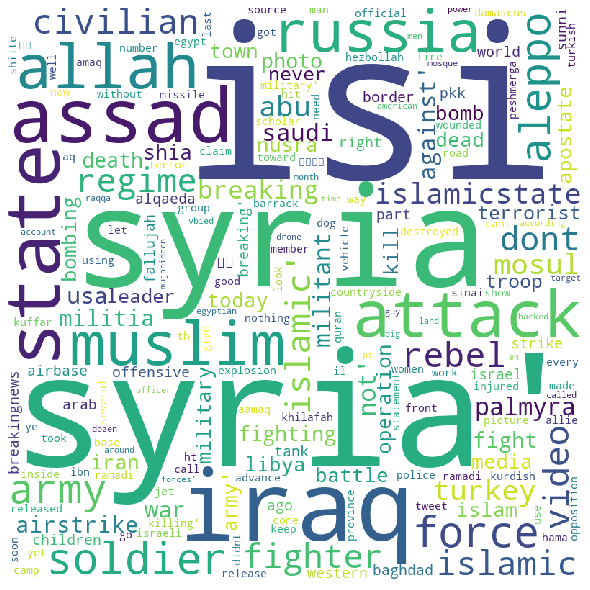

In [58]:

def wordcloud_tweets(tweet):
   wordcloud = WordCloud(width = 800, height = 800, 
                   background_color ='white',                 
                   min_font_size = 10).generate(str(tweet))               
   plt.figure(figsize = (8, 8), facecolor = None) 
   plt.imshow(wordcloud) 
   plt.axis("off") 
   plt.tight_layout(pad = 0)   
   plt.show() 
    
wordcloud_tweets(tweet_tokens_joined)   
    

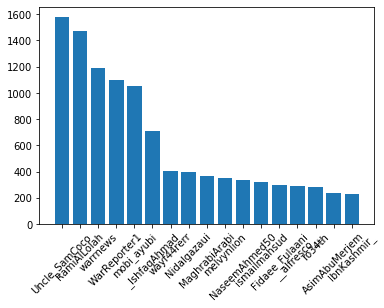

'\nimport seaborn as sns\nax = sns.countplot(x="username",data=df_username )\nax.xticks(range(len(df_username)), df_username.index.values)\n'

In [59]:
df_tweet_resetindex=df_tweets.reset_index(level='username')
#print(df_tweet_resetindex.groupby('username').count())
dict_username=df_tweet_resetindex['username'].value_counts()[df_tweet_resetindex['username'].value_counts()>200].to_dict()
df_username = pd.Series(dict_username)
plt.bar(range(len(df_username)), df_username.values)
plt.xticks(range(len(df_username)), df_username.index.values)

plt.xticks(rotation=45)
plt.show()

'''
import seaborn as sns
ax = sns.countplot(x="username",data=df_username )
ax.xticks(range(len(df_username)), df_username.index.values)
'''


